# Information Management experts using “We” by TRIPLE

This Jupyter notebook use the API from the ”We” plateform to build a semantic dashboard (TopicsBox) about experts in Information Management. This notebook use Python3 with :
- SPARQLWrapper
- JSON
- Matplotlib
- Pandas

(for this example, we simulate with https://isidore.science SPARQL endpoint and a internal SPARQL entpoint).

## Discipline analysis of an author's publications
We analyze the disciplinary distribution of publications of an author represented by his URI (<http://isidore.science/a/pouyllau_stephane>). The SPARQL query is: 

```SPARQL
SELECT ?label (count(?documents) as ?count) WHERE {
?documents dcterms:creator <http://isidore.science/a/pouyllau_stephane>.
?documents sioc:topic ?topic.
    ?topic skos:prefLabel ?label.
    FILTER(lang(?label)="fr")
}
GROUP BY ?label
ORDER BY DESC(?count) LIMIT 100
```
Example of an expertises fields :

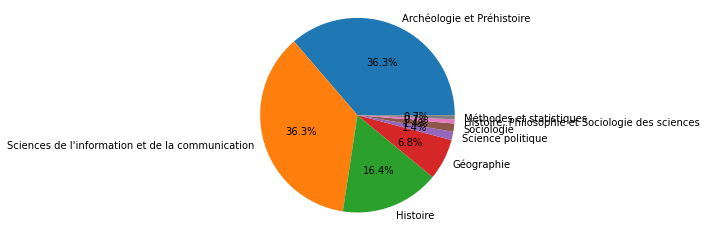

In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import matplotlib.pyplot as plt

sparql = SPARQLWrapper("http://isidore.science/sparql")
sparql.setQuery("""
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX ore: <http://www.openarchives.org/ore/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
SELECT ?label (count(?documents) as ?count) WHERE {
?documents dcterms:creator <http://isidore.science/a/pouyllau_stephane>.
?documents sioc:topic ?topic.
    ?topic skos:prefLabel ?label.
    FILTER(lang(?label)="fr")
}
GROUP BY ?label
ORDER BY DESC(?count) LIMIT 100
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results_df = pd.json_normalize(results['results']['bindings'])
labels = results_df['label.value']
data = results_df['count.value']
plt.pie(data,labels=labels,explode=None,autopct='%1.1f%%',shadow=False)
plt.axis('equal')
plt.show()
plt.close()

Python code for <http://isidore.science/a/minel_jean_luc>

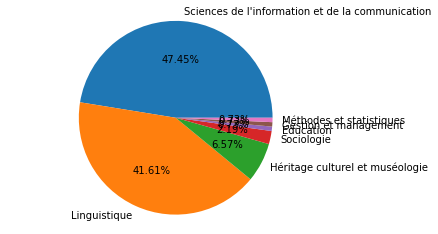

In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import matplotlib.pyplot as plt

sparql = SPARQLWrapper("http://isidore.science/sparql")
sparql.setQuery("""
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX ore: <http://www.openarchives.org/ore/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
SELECT ?label (count(?documents) as ?count) WHERE {
?documents dcterms:creator <http://isidore.science/a/minel_jean_luc>.
?documents sioc:topic ?topic.
    ?topic skos:prefLabel ?label.
    FILTER(lang(?label)="fr")
}
GROUP BY ?label
ORDER BY DESC(?count) LIMIT 100
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results_df = pd.json_normalize(results['results']['bindings'])
labels = results_df['label.value']
data = results_df['count.value']
plt.pie(data,labels=labels,explode=None,autopct='%1.2f%%',shadow=False,radius=0.9)
plt.axis('equal')
plt.show()
plt.close()

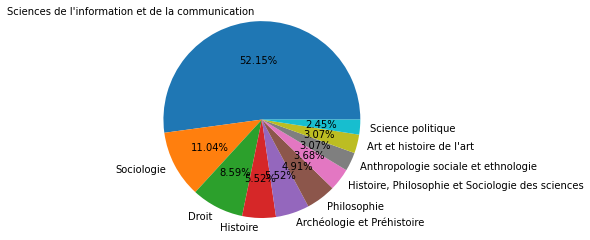

In [3]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import matplotlib.pyplot as plt

sparql = SPARQLWrapper("http://isidore.science/sparql")
sparql.setQuery("""
PREFIX sioc: <http://rdfs.org/sioc/ns#>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX ore: <http://www.openarchives.org/ore/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
SELECT ?label (count(?documents) as ?count) WHERE {
?documents dcterms:creator <http://isidore.science/a/mounier_pierre>.
?documents sioc:topic ?topic.
    ?topic skos:prefLabel ?label.
    FILTER(lang(?label)="fr")
}
GROUP BY ?label
ORDER BY DESC(?count) LIMIT 10
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results_df = pd.json_normalize(results['results']['bindings'])
labels = results_df['label.value']
data = results_df['count.value']
plt.pie(data,labels=labels,explode=None,autopct='%1.2f%%',shadow=False,radius=0.9)
plt.axis('equal')
plt.show()
plt.close()

## Computing co-authors and co-publications from an author

In [4]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd

sparql = SPARQLWrapper("https://isidore.science/sparql")
sparql.setQuery("""
SELECT ?coauteurs (count(?documents) as ?count) WHERE {
?documents dcterms:creator <http://isidore.science/a/mounier_pierre>.
?documents dcterms:creator ?coauteurs
FILTER(?coauteurs != <http://isidore.science/a/mounier_pierre>)
} GROUP BY ?coauteurs
ORDER BY DESC(?count) LIMIT 10
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results_df = pd.pandas.json_normalize(results['results']['bindings'])
results_df[['coauteurs.value', 'count.value']].head(10)

coauteurs.value count.value
0            http://isidore.science/a/dacos_marin          20
1  http://isidore.science/a/prochasson_christophe           5
2     http://isidore.science/a/fabiani_jean_louis           4
3         http://isidore.science/a/perrot_martyne           4
4           http://isidore.science/a/boutier_jean           4
5       http://isidore.science/a/wieviorka_michel           4
6        http://isidore.science/a/kaiser_wolfgang           3
7            http://isidore.science/a/fer_yannick           3
8            http://isidore.science/a/vidal_denis           3
9    http://isidore.science/a/schnapper_dominique           3

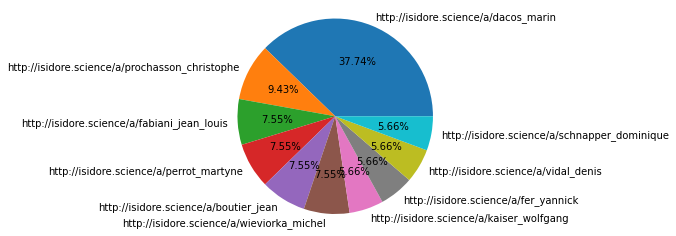

In [5]:
labels = results_df['coauteurs.value']
data = results_df['count.value']
plt.pie(data,labels=labels,explode=None,autopct='%1.2f%%',shadow=False,radius=0.9)
plt.axis('equal')
plt.show()
plt.close()